In [24]:
import numpy as np
import xarray as xr
import xrft
import gsw
import os.path as op
from dask.diagnostics import ProgressBar
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
import matplotlib.pyplot as plt
import matplotlib.colors as clr
%matplotlib inline

In [25]:
pdir = '/swot/SUM05/takaya/MITgcm/channel/runs/'
bdir = '/swot/SUM02/takaya/channelMOC-Darwin/'

In [4]:
ys, dy = (20,10)
dt = 3e2
ts = int((ys*360*86400)/dt+288)
te = int(((ys+dy)*360*86400)/dt+288)
print(ts,te)

ds1 = open_mdsdataset(op.join(ddir,'deepML-2mon_5kmKPP'), grid_dir=op.join(ddir,'5km_grid'),
                     iters=range(ts,te,288), prefix=['KPPboundary'], delta_t=dt
                     )
ds1

2073888 3110688


/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = X
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 3600)
Coordinates:
  * XC        (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC        (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG        (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG        (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z         (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1       (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu        (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zl        (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA        (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG       (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG       (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth 

In [5]:
ys, dy = (58,8)
dt = 3e2
ts = int((ys*360*86400)/dt)
te = int(((ys+dy)*360*86400)/dt)
print(ts,te)

ds2 = open_mdsdataset(op.join(ddir,'deepML_5km_consTauKPP'), grid_dir=op.join(ddir,'5km_grid'),
                     iters=range(ts,te,288), prefix=['KPPboundary'], delta_t=dt
                     )
ds2

6013440 6842880


/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/deepML_5km_consTauKPP. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 2880)
Coordinates:
  * XC        (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC        (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG        (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG        (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z         (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1       (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu        (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zl        (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA        (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG       (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG       (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth 

In [6]:
ys, dy = (82,8)
dt = 3e2
ts = int((ys*360*86400)/dt)
te = int(((ys+dy)*360*86400)/dt)
print(ts,te)

ds3 = open_mdsdataset(op.join(ddir,'deepML_5km_consTKPP'), grid_dir=op.join(ddir,'5km_grid'),
                     iters=range(ts,te,288), prefix=['KPPboundary'], delta_t=dt
                     )
ds3

8501760 9331200


/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/deepML_5km_consTKPP. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 2880)
Coordinates:
  * XC        (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC        (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG        (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG        (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z         (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1       (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu        (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zl        (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA        (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG       (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG       (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth 

In [11]:
MLD = ds1.MXLDEPTH
MLDTau = ds2.MXLDEPTH
MLDSST = ds3.MXLDEPTH

MLD.coords['mon'] = ('time',np.tile(np.repeat(range(12),30),10))
MLDTau.coords['mon'] = ('time',np.tile(np.repeat(range(12),30),8))
MLDSST.coords['mon'] = ('time',np.tile(np.repeat(range(12),30),8))
with ProgressBar():
    MLDmon = MLD.groupby('mon').mean(['time','XC']).compute()
    MLDTaumon = MLDTau.groupby('mon').mean(['time','XC']).compute()
    MLDSSTmon = MLDSST.groupby('mon').mean(['time','XC']).compute()

[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  4.6s
[########################################] | 100% Completed |  4.7s


In [31]:
ys, dy = (64,5)
dt = 18e2
df = 48
# ts = int(360*86400*ys/8e2 + 30e0*360*86400/12e2 + 12e0*360*86400/dt) # no S.B. 
ts = int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 + 127*360*86400/dt) # S.B.
# ts = int(360*86400*ys/8e2)
te = int(ts+360*86400*dy/dt)
print(ts,te)

ds4 = open_mdsdataset(op.join(bdir,'20kmMLI_Ce007_tau55D'), grid_dir=op.join(pdir,'20km_grid'),
                     iters=range(ts+df,te+df,df), prefix=['KPPboundary'], delta_t=dt
                     )
# ds5 = open_mdsdataset(op.join(ddir,'zerores_20km_MOMbgc'), grid_dir=op.join(ddir,'20km_grid'),
#                      iters=range(ts,te,df), prefix=['MOMtave'], delta_t=dt
#                      )
ds4

5650560 5736960


/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM02/takaya/channelMOC-Darwin/20kmMLI_Ce007_tau55D. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 50, XG: 50, YC: 100, YG: 100, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * XG       (XG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * YG       (YG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dxG      (YG, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dyG      (YC, XG) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth    (YC, XC) >f4 das

In [39]:
# MLD20 = ds4.MXLDEPTH
XLD20mli = xr.DataArray(np.percentile(ds4.KPPhbl, 99, axis=-1), dims=['time','YC'],
                       coords={'time':ds4.time,'YC':ds4.YC})
# MLD20.coords['mon'] = ('time',np.tile(np.repeat(range(12),30),5))
XLD20mli.coords['month'] = ('time',np.tile(np.repeat(range(12),30),dy))
XLD20mli.coords['day'] = ('time',np.tile(range(360),dy))
XLD20mli.to_dataset(name='hbl99').to_netcdf(op.join(bdir,'KPPhbl_99percentile_20kmMLI-Ce007_Tau55-02km.nc'))
# with ProgressBar():
#     MLD20mon = MLD20.groupby('mon').mean(['time','XC']).compute()
#     hbl20mon = hbl20.groupby('mon').mean(['time']).compute()

In [37]:
# MLD20.to_dataset(name='MLD').to_netcdf(op.join(ddir,'MLD_20km.nc'))
# hbl20.to_dataset(name='MXLD').to_netcdf(op.join(ddir,'MXLD_20km.nc'))
# MLD20 = xr.open_dataset(op.join(ddir,'KPPMLD_20km.nc')).mld
XLD20 = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_20km.nc')).hbl99
# XLD20mli = xr.open_dataset(op.join(bdir,'KPPhbl_99percentile_20kmMLI-02km.nc'),decode_times=False).hbl99
# XLD20mli = xr.open_dataset(op.join(bdir,'KPPhbl_99percentile_20kmMLI-Ce01-02km.nc'),decode_times=False).hbl99
# MLD05 = xr.open_dataset(op.join(ddir,'KPPMLD_05km.nc')).mld
XLD05 = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_05km.nc')).hbl99
XLD02 = xr.open_dataset(op.join(bdir,'KPPhbl_99percentile_02km.nc'),decode_times=False).hbl99
with ProgressBar():
#     MLD20mon = MLD20.groupby('month').mean(['time','XC']).compute()
    XLD20mon = XLD20.groupby('month').mean(['time']).compute()
#     MLD05mon = MLD05.groupby('month').mean(['time','XC']).compute()
    XLD05mon = XLD05.groupby('month').mean(['time']).compute()
    XLD02mon = XLD02.groupby('month').mean(['time']).compute()
    XLD20mlimon = XLD20mli.groupby('month').mean(['time']).compute()
    XLD05day = XLD05.groupby('day').mean(['time']).compute()
    XLD02day = XLD02.groupby('day').mean(['time']).compute()
    XLD20day = XLD20.groupby('day').mean(['time']).compute()
    XLD20mliday = XLD20mli.groupby('day').mean(['time']).compute()

In [8]:
# MLD.to_dataset(name='KPPMLD').to_netcdf(op.join(ddir,'MLD_5km.nc'))
# MLDTau.to_dataset(name='KPPMLD').to_netcdf(op.join(ddir,'MLD_5km_tauconst.nc'))
# MLDSST.to_dataset(name='KPPMLD').to_netcdf(op.join(ddir,'MLD_5km_sstconst.nc'))

In [5]:
# hbl = xr.DataArray(np.percentile(ds1.KPPhbl, 99, axis=-1), dims=['time','YC'],
#                   coords={'time':ds1.time,'YC':ds1.YC})
# hblTau = xr.DataArray(np.percentile(ds2.KPPhbl, 99, axis=-1), dims=['time','YC'],
#                      coords={'time':ds2.time,'YC':ds2.YC})
# hblSST = xr.DataArray(np.percentile(ds3.KPPhbl, 99, axis=-1), dims=['time','YC'],
#                      coords={'time':ds3.time,'YC':ds3.YC})

# hbl.coords['mon'] = ('time',np.tile(np.repeat(range(12),30),10))
# hblTau.coords['mon'] = ('time',np.tile(np.repeat(range(12),30),8))
# hblSST.coords['mon'] = ('time',np.tile(np.repeat(range(12),30),8))
# with ProgressBar():
#     hblmon = hbl.groupby('mon').mean(['time']).compute()
#     hblTaumon = hblTau.groupby('mon').mean(['time']).compute()
#     hblSSTmon = hblSST.groupby('mon').mean(['time']).compute()

In [47]:
hbl

<xarray.DataArray (time: 3600, YC: 400)>
array([[   0.      , 1560.220099, 1554.963833, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1560.937764, 1555.213762, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1561.792715, 1555.123916, ...,   30.      ,   30.      ,
          30.      ],
       ...,
       [   0.      , 1569.819802, 1557.266178, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1569.56145 , 1557.079993, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1568.676396, 1557.464979, ...,   30.      ,   30.      ,
          30.      ]])
Coordinates:
  * time     (time) float64 6.222e+08 6.223e+08 6.223e+08 6.224e+08 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    mon      (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...

[Text(0,0,'-360'),
 Text(0,0,'-270'),
 Text(0,0,'-180'),
 Text(0,0,'-90'),
 Text(0,0,'0')]

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


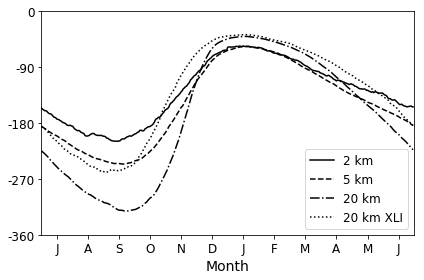

In [44]:
fig, ax = plt.subplots(figsize=(6,4))
fig.set_tight_layout(True)
ax.plot(range(360), -XLD02day.sel(YC=slice(6e5,14e5)).mean('YC').roll(day=-180), color='k', ls='-', label=r'2 km')
ax.plot(range(360), -XLD05day.sel(YC=slice(6e5,14e5)).mean('YC').roll(day=-180), color='k', ls='--', label=r'5 km')
ax.plot(range(360), -XLD20day.sel(YC=slice(6e5,14e5)).mean('YC').roll(day=-180), color='k', ls='-.', label=r'20 km')
ax.plot(range(360), -XLD20mliday.sel(YC=slice(6e5,14e5)).mean('YC').roll(day=-180), color='k', ls=':', label=r'20 km XLI')
ax.set_xticks(range(15,360,30))
ax.set_xticklabels(np.roll(['J','F','M','A','M','J','J','A','S','O','N','D'],-6), fontsize=12)
ax.set_xlabel(r"Month", fontsize=14)
ax.legend(loc='lower right', fontsize=12)
ax.set_xlim([0.,360.])
ax.set_ylim([-3.6e2,0.])
ax.set_yticks([-360,-270,-180,-90,0])
ax.set_yticklabels(np.array([-360,-270,-180,-90,0]), fontsize=12)

In [46]:
# hbl.to_dataset(name='MXLD').to_netcdf(op.join(ddir,'MXLD_05km_zonalave.nc'))

In [53]:
# MLD10 = xr.open_dataarray(op.join(ddir,'MLD_10km_zonalave.nc')).groupby('DinM').mean(['time','XC']).compute()
# MXLD10 = xr.open_dataarray(op.join(ddir,'MXLD_10km_zonalave.nc')).groupby('DinM').mean('time').compute()

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


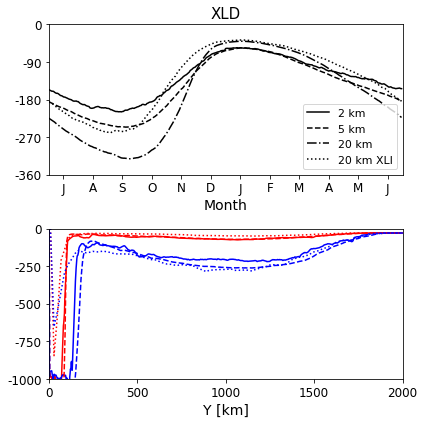

In [48]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,6))
fig.set_tight_layout(True)
ax1.plot(range(360), -XLD02day.sel(YC=slice(6e5,14e5)).mean('YC').roll(day=-180), color='k', ls='-', label=r'2 km')
ax1.plot(range(360), -XLD05day.sel(YC=slice(6e5,14e5)).mean('YC').roll(day=-180), color='k', ls='--', label=r'5 km')
ax1.plot(range(360), -XLD20day.sel(YC=slice(6e5,14e5)).mean('YC').roll(day=-180), color='k', ls='-.', label=r'20 km')
ax1.plot(range(360), -XLD20mliday.sel(YC=slice(6e5,14e5)).mean('YC').roll(day=-180), color='k', ls=':', label=r'20 km XLI')
ax1.set_xticks(range(15,360,30))
ax1.set_xticklabels(np.roll(['J','F','M','A','M','J','J','A','S','O','N','D'],-6), fontsize=12)
ax1.set_xlabel(r"Month", fontsize=14)
ax1.legend(loc='lower right', fontsize=11)
ax1.set_xlim([0.,360.])
ax1.set_ylim([-3.5e2,0.])
ax1.set_yticks(np.array([-360,-270,-180,-90,0]))
ax1.set_yticklabels(np.array([-360,-270,-180,-90,0]), fontsize=12)
# ax3.plot(MLD05mon.YC*1e-3, -MLD05mon[0], lw=2, color='r', ls='-', label=r'5 km (Jan)')
# ax3.plot(MLD05mon.YC*1e-3, -MLD05mon[8], lw=2, color='b', ls='-', label=r'5 km (Sep)')
# ax1.plot(MLD10.YC*1e-3, -MLD10[1], lw=2, color='r', ls='--', label=r'10 km (Feb)')
# ax1.plot(MLD10.YC*1e-3, -MLD10[7], lw=2, color='b', ls='--', label=r'10 km (Aug)')
# ax3.plot(MLD20mon.YC*1e-3, -MLD20mon[0], lw=2, color='r', ls=':', label=r'20 km (Jan)')
# ax3.plot(MLD20mon.YC*1e-3, -MLD20mon[8], lw=2, color='b', ls=':', label=r'20 km (Sep)')
ax2.plot(XLD02mon.YC*1e-3, -XLD02mon[1], color='r', ls='-', label=r'2 km (Feb)')
ax2.plot(XLD02mon.YC*1e-3, -XLD02mon[8], color='b', ls='-', label=r'2 km (Sep)')
ax2.plot(XLD05mon.YC*1e-3, -XLD05mon[1], color='r', ls='--', label=r'5 km (Feb)')
ax2.plot(XLD05mon.YC*1e-3, -XLD05mon[8], color='b', ls='--', label=r'5 km (Sep)')
# ax2.plot(MXLD10.YC*1e-3, -MXLD10[1], lw=2, color='r', ls='--', label=r'10 km (Feb)')
# ax2.plot(MXLD10.YC*1e-3, -MXLD10[7], lw=2, color='b', ls='--', label=r'10 km (Aug)')
# ax2.plot(XLD20mon.YC*1e-3, -XLD20mon[0], color='r', ls='-.', label=r'20 km (Jan)')
# ax2.plot(XLD20mon.YC*1e-3, -XLD20mon[8], color='b', ls='-.', label=r'20 km (Sep)')
ax2.plot(XLD20mlimon.YC*1e-3, -XLD20mlimon[1], color='r', ls=':', label=r'20 km MLI (Feb)')
ax2.plot(XLD20mlimon.YC*1e-3, -XLD20mlimon[8], color='b', ls=':', label=r'20 km MLI (Sep)')
# ax2.legend(loc='lower right', fontsize=11)
# ax1.set_xlabel(r'YC [km]', fontsize=14)
# ax2.set_ylabel(r'Depth [m]', fontsize=14)
# ax3.set_xlim([0.,2e3])
ax2.set_xlabel(r'Y [km]', fontsize=14)
# ax3.set_ylabel(r'Depth [m]', fontsize=14)
ax2.set_xlim([0.,2e3])
ax2.set_xticks(np.array([0,500,1000,1500,2000]))
ax2.set_xticklabels(np.array([0,500,1000,1500,2000]), fontsize=12)
# ax3.set_ylim([-2000,0.])
ax2.set_ylim([-1000,0.])
ax2.set_yticks(np.array([-1000,-750,-500,-250,0]))
ax2.set_yticklabels(np.array([-1000,-750,-500,-250,0]), fontsize=12)
# ax3.set_title("MLD", fontsize=16)
ax1.set_title("XLD", fontsize=15)
plt.savefig(op.join(pdir,'Figures/XLD_Feb_Sep-clim.pdf'))

Text(0.5,1,'MXLD')

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


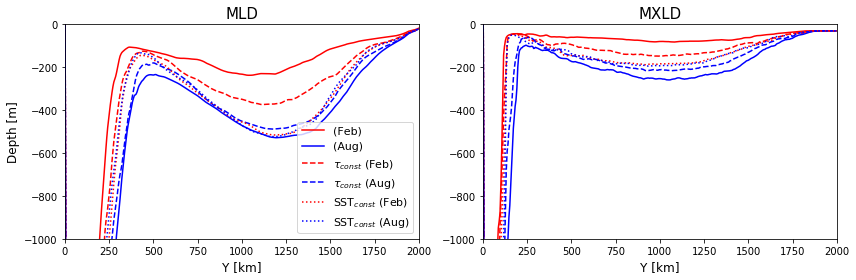

In [41]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
fig.set_tight_layout(True)
ax1.plot(MLDmon.YC*1e-3, -MLDmon[1], 'r', label=r"(Feb)")
ax1.plot(MLDmon.YC*1e-3, -MLDmon[7], 'b', label=r"(Aug)")
ax1.plot(MLDTaumon.YC*1e-3, -MLDTaumon[1], 'r--', label=r"$\tau_{const}$ (Feb)")
ax1.plot(MLDTaumon.YC*1e-3, -MLDTaumon[7], 'b--', label=r"$\tau_{const}$ (Aug)")
ax1.plot(MLDSSTmon.YC*1e-3, -MLDSSTmon[1], 'r:', label=r"SST$_{const}$ (Feb)")
ax1.plot(MLDSSTmon.YC*1e-3, -MLDSSTmon[7], 'b:', label=r"SST$_{const}$ (Aug)")
ax2.plot(hblmon.YC*1e-3, -hblmon[1], 'r', label=r"(Feb)")
ax2.plot(hblmon.YC*1e-3, -hblmon[7], 'b', label=r"(Aug)")
ax2.plot(hblTaumon.YC*1e-3, -hblTaumon[1], 'r--', label=r"$\tau_{const}$ (Feb)")
ax2.plot(hblTaumon.YC*1e-3, -hblTaumon[7], 'b--', label=r"$\tau_{const}$ (Aug)")
ax2.plot(hblSSTmon.YC*1e-3, -hblSSTmon[1], 'r:', label=r"SST$_{const}$ (Feb)")
ax2.plot(hblSSTmon.YC*1e-3, -hblSSTmon[7], 'b:', label=r"SST$_{const}$ (Aug)")
ax1.legend(loc='lower right', fontsize=11)
ax1.set_xlabel(r"Y [km]", fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax1.set_xlim([0,2e3])
ax1.set_ylim([-1e3,0])
ax2.set_xlabel(r"Y [km]", fontsize=12)
ax2.set_xlim([0,2e3])
ax2.set_ylim([-1e3,0])
ax1.set_title(r"MLD", fontsize=15)
ax2.set_title(r"MXLD", fontsize=15)
# plt.savefig(op.join(ddir,'Figures/MLD_5kmcomp.pdf'))

In [ ]:
hbl = ds1.KPPhbl
hbl99 = xr.DataArray(np.percentile(hbl, 99, axis=-1), dims=['time','YC'],
                    coords={'time':ds1.time,'YC':ds1.YC})
hblTau = ds2.KPPhbl
hblTau99 = xr.DataArray(np.percentile(hblTau, 99, axis=-1), dims=['time','YC'],
                       coords={'time':ds2.time,'YC':ds2.YC})
hblSST = ds3.KPPhbl
hblSST99 = xr.DataArray(np.percentile(hblSST, 99, axis=-1), dims=['time','YC'],
                       coords={'time':ds3.time,'YC':ds3.YC})

hbl99.coords['mon'] = ('time',np.tile(np.repeat(range(12),30),10))
hblTau99.coords['mon'] = ('time',np.tile(np.repeat(range(12),30),8))
hblSST99.coords['mon'] = ('time',np.tile(np.repeat(range(12),30),8))
hbl99

In [ ]:
hbl99.to_dataset(name='KPPbl').to_netcdf(op.join(ddir,'KPPbl_99percen_5km.nc'))
hblTau99.to_dataset(name='KPPbl').to_netcdf(op.join(ddir,'KPPbl_99percen_5km_tauconst.nc'))
hblSST99.to_dataset(name='KPPbl').to_netcdf(op.join(ddir,'KPPbl_99percen_5km_sstconst.nc'))

In [ ]:
ys, dy = (170,10)
dt = 6e2
df = 144
ts = int((ys*360*86400)/dt+df)
te = int(((ys+dy)*360*86400)/dt+df)
print(ts,te)

ds4 = open_mdsdataset(op.join(ddir,'zerores_deepML_LayersKPP'), grid_dir=op.join(ddir,'10km_grid'),
                     iters=range(ts,te,df), prefix=['KPPboundary'], delta_t=dt
                     )
ds4

8812944 9331344


/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [ ]:
MLD10 = ds4.MXLDEPTH
MLD10.coords['mon'] = ('time',np.tile(np.repeat(range(12),30),10))
MLD10.to_dataset(name='KPPMXLD').to_netcdf(op.join(ddir,'MLD_10km.nc'))

In [30]:
hbl10 = ds4.KPPhbl
hbl1099 = xr.DataArray(np.percentile(hbl10, 99, axis=-1), dims=['time','YC'],
                     coords={'time':ds4.time,'YC':ds4.YC})
hbl1099.coords['mon'] = ('time',np.tile(np.repeat(range(12),30),10))
hbl1099.to_dataset(name='KPPbl').to_netcdf(op.join(ddir,'KPPbl_99percen_10km.nc'))